# 回归分析

## 0.0 目录
1.回归模型

2.普通最小二乘法

3.推断和假设检验

4.多变量的多种形式

5.假设误差分析

6.异方差下的回归分析

## 0.1 从建模的目的看回归

回归分析与分类分析都是一种基于统计模型的统计分析方法。它们都研究因变量（被解释变量）与自变量（解释变量）之间存在的潜在关系，并通过统计模型的形式将这些潜在关系进行显式的表达。不同的是，回归分析中因变量是连续变量，如工资、销售额；而分类分析中因变量是属性变量，如判断邮件“是or否”为垃圾邮件。

回归分析的过程本质上一种建模过程。统计建模的主要任务有二：预测与推断。

所谓预测，就是利用一个训练完毕的模型$\hat{f}$，根据输入的自变量$X$获得对应的输出$Y$。在预测任务中，如果模型$\hat{f}$可以准确地提供预测，那么$\hat{f}$是什么形式并不重要，而如果$\hat{f}$的形式非常复杂且难以解释，我们可以将之称为黑盒模型(Black Box)。事实上，当前具有强大预测性能的模型大多都是黑盒模型，如强大的Xgboost机器学习算法以及各种深度学习算法，它们的模型可解释性差，我们难以解释其中一些参数的含义与统计性质。

与预测相对应的另一任务便是推断。在很多情况下，我们对当$X_1,X_2,\cdots ,X_p$变化时**如何影响**$Y$更感兴趣，此时，我们估计模型$\hat{f}$的目的不是为了预测$Y$，而是想明白两者之间的关系，更深层次地讲，我们想要知道模型内各种参数的数值与统计推断性质等等。在这种情况下，模型的可解释性就非常重要了，而通常我们在推断任务中最常使用的模型正是线性回归模型。举一个例子，在研究各因素对商品销售量的场景中，我们会更关注以下问题：哪类媒体对销量有直接的贡献？增加电视广告费用能对销售量带来多少程度的增加？等等，这就是典型的推断问题。

弄清楚了预测与推断的区别，我们重新审视一下回归分析：回归分析更加注重对因变量与自变量之间潜在关系的推断，所使用的统计模型也相对简单（一般为线性模型），如果你在比赛中需要分析各变量间的潜在相关关系，便可以考虑使用回归分析。


# 1.回归模型

## 1.1 回归思想与一般回归模型

### 1.1.1 横截面数据

横截面数据是回归分析最主要的分析数据类型，它可以视为在**同一时间点（或抽样时间差异可以被忽略）**上对**多个抽样个体**的观测数据。通常，我们记第$i$个个体的观测数据为$(x_i,y_i)$。如果以抽样时间点与抽样个体数目为维度划分数据类型，除了横截面数据外，还有时间序列数据以及面板数据。时间序列数据为单个个体在不同时间点上的观测数据，而面板数据则是多个个体在不同时间点上的观测数据。对时间序列数据的分析需要用到时间序列分析的知识，对面板数据的分析则是高级计量经济学的内容。三者的区别如下图所示：

<img src="./images/横截面数据.png">

### 1.1.2 回归思想——条件均值建模

横截面数据最重要的一个特征，就是我们可以将采集的数据$(x_1,y_1),(x_2,y_2),…,(x_n,y_n)$近似视为来自一个潜在总体的随机样本，即假设

$$
E(y \mid x), \operatorname{Var}(y \mid x)
$$
而回归正是利用条件均值$E(y \mid x)$来刻画$x$与$y$的关系，回归建模的本质也正是“条件均值的建模”。那么，怎么理解条件均值建模呢？我们举一个不典型的例子帮助大家理解。

假设某个样本量为100的数据集中，自变量$x$有1,2,3,4,5五个值，样本的因变量$y$都来自以其自变量为均值，方差为1的正态分布。我们想要刻画因变量与自变量之间的变化关系，就要找出可以代表各种类样本内（在此例中以自变量为划分依据）共性的特征，用这些特征来描绘变化关系。最直观也是最简单的特征就是条件均值，即给定$x$的条件下样本的均值。


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from IPython.display import display

Text(0.5, 1.0, 'E(Y|X)')

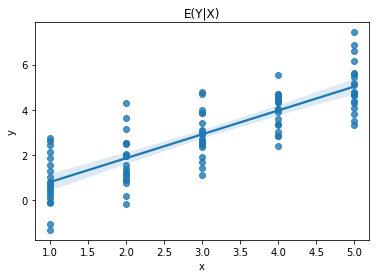

In [5]:
x=list()
y=list()
for i in [1,2,3,4,5]:
    y_norm=stats.norm.rvs(i,1,20,random_state=i).tolist()
    y.extend(y_norm)
    x1=np.ones(20)*i
    x1=x1.tolist()
    x.extend(x1)

data={'x':x,'y':y}
df=pd.DataFrame(data)

sns.regplot(x='x',y='y',data=df)
plt.title('E(Y|X)')

根据上图我们可以看出，$E(y|x=1)=1$,$E(y|x=2)=2$,…,$E(y|x=x_0)=x_0$。通过条件均值，我们可以推断出$x$与$y$的关系可以用模型$y=x+u$来刻画，其中，$u$被称为随机误差，可理解为：除$x$外，其他影响$y$取值的因素。

使用模型$y=x+u$刻画了$x$与$y$的关系，这说明了在这个数据集中我们将模型设定为了
$$
y=x+u
$$
事实上，如果我们将上述公式中的$x$泛化成条件均值$E(y|x)$，那么我们就能得到最一般的回归模型
$$
y=E(y|x)+u
$$
这也就意味着，所谓回归模型的建模，**本质上就是条件均值建模**

## 1.2 线性回归模型

### 1.2.1 线性模型形式

上面的学习中我们介绍了回归模型的一般形式。在实际建模中，为了有效的估计，我们必须对模型中$m(x)$的形式进行具体的假定。在所有模型假定形式中，线性回归模型是最常用假定形式，也是回归分析中最重要的模型，是本次课程重点讲解的内容。

线性模型假设有：
$$
m(x)=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{p} x_{p}
$$
于是，线性回归模型可表示为：
$$
y=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{p} x_{p}+u, \quad E\left(u \mid x_{1}, \cdots, x_{p}\right)=0
$$
回归分析主要研究如何有效地估计模型中的参数$\hat{\beta}_i$，并利用模型进行推断与预测。

### 1.2.2 从简单线性回归到多元线性回归

**· 用简单线性回归理解对模型的解释**

为大家快速理解线性回归模型，我们先假设$x$是一维的，即只考虑一个因素对$y$的影响，此时亦称模型为简单线性回归，形式为
$$
y=\beta_{0}+\beta_{1} x+u, \quad E(u \mid x)=0
$$
$\beta_{0}$是截距项，可以理解为$x=0$时$y$的期望值，一般情况下，如果我们回归的任务是推断，则截距通常不重要；
<br>
$\beta_{1}=\frac{\Delta m(x)}{\Delta x}$，可理解为$x$每增加一个单位，$y$**平均**增加$\beta_1$个单位。

此后，我们将默认模型含有$E(u|x)=0$的设定（因为只有这样模型才代表回归模型），该条件不再以书面形式写出。

我们举一个例子帮助大家理解：

**Example1.** 假设大学成绩colGPA与大学测验水平ACT间关系为
$$
\text { colGPA }=\beta_{0}+\beta_{1} \text { hsGPA }+u
$$
$\beta_1$系数的解释为：每增加1单位大学测验水平，大学成绩会增加$\beta_1$个单位；由于该模型中自变量只有高中成绩，而大学成绩水平肯定还受其他因素影响，因此该模型中的随机误差包含了如高中成绩、自主学习能力等因素。

注意：设定$E(u|x)=0$的存在暗含了**在该模型中**高中测验成绩、自主学习能力等因素与自变量大学测验水平无关，但这在**实际问题中**未必成立。而一旦它们存在相关性，就意味着模型假设不符合实际情况，模型估计的有效性与准确性也将受到影响。

**· 进行全面的回归建模——多元线性回归**

单纯的简单线性模型有很大的局限性，原因有二：

1、在实际问题中，因变量$y$通常受多个因素影响，这些因素之间可能彼此之间存在线性相关性（后续的学习中我们将这种现象称为多重共线性），而默认假设$E(u|x)=0$的直接推论(推论2)就是其他影响因素与$x$线性无关，显然不一定符合实际情况。

2、如果我们想推断一个变量对另一个变量的因果关系，就要保持尽可能多的其他因素的不变，因此需要尽量把关键因素纳入到回归模型当中，这样便可以控制多个变量，查看某个特定变量变化对自变量的影响。

因此在实际问题中，我们更多地使用多元线性回归。一般的多元线性回归模型可写成：
$$
y=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{k} x_{k}+u
$$
$u$依旧为随机误差项，它表示除$x_1$,…,$x_k$以外的其他因素对因变量$y$的影响，且同样满足假设
$$
E\left(u \mid x_{1}, \cdots, x_{k}\right)=0
$$
$\beta_i=\frac{\partial m\left( x \right)}{\partial x_i}$是回归函数对变量$x_i$的偏导数，它被解释为**在保持其他自变量不变的情况下，$x_i$每增加一单位，$y$平均增加$\beta_i$个单位**

**· Example2.** 依旧以上面的大学成绩例子为例，这一次我们增加一个高中成绩hsGPA变量，此时模型变为
$$
\mathrm{colGPA}=\beta _0+\beta _1\mathrm{hsGPA}+\beta _2\mathrm{ACT}+u
$$
在模型增加了一个我们认为非常重要的变量后，模型的估计会产生怎样的变化呢？我们使用python对该例的数据集进行回归分析，比较两种模型的区别。具体的python实现过程我们将稍后介绍，大家只需要关注这里的结果即可。

In [6]:
import statsmodels.api as sm

In [9]:
# 加载数据
gpa1=pd.read_stata('./data/gpa1.dta')

# 在数据集中提取自变量
X1=gpa1.ACT
X2=gpa1[['ACT','hsGPA']]
# 提取因变量
y=gpa1.colGPA

# 为自变量增添截距项
X1=sm.add_constant(X1)
X2=sm.add_constant(X2)
display(X2)

,const,ACT,hsGPA
0,1.0,21.0,3.0
1,1.0,24.0,3.2
2,1.0,26.0,3.6
3,1.0,27.0,3.5
4,1.0,28.0,3.9
...,...,...,...
136,1.0,23.0,3.3
137,1.0,25.0,3.6
138,1.0,21.0,3.4
139,1.0,26.0,3.7


In [ ]:
# 拟合两个模型
gpa_lm1=sm.OLS(y,X1).fit()
gpa_lm2=sm.OLS(y,X2).fit()

# 输出两个模型的系数与对应p值
p1=pd.DataFrame(gpa_lm1.pvalues,columns=['pvalue'])
c1=pd.DataFrame(gpa_lm1.params,columns=['params'])
p2=pd.DataFrame(gpa_lm2.pvalues,columns=['pvalue'])
c2=pd.DataFrame(gpa_lm2.params,columns=['params'])
display(c1.join(p1,how='right'))
display(c2.join(p2,how='right'))

,params,pvalue
const,2.402979,8.798591e-16
ACT,0.027064,1.389927e-02


,params,pvalue
const,1.286328,0.000238
ACT,0.009426,0.383297
hsGPA,0.453456,0.000005


我们发现，变量ACT在两个回归模型中的系数并不一致，且其在单独回归时变量显著，但增添了变量hsGPA后变得不显著。这说明多个变量共同回归绝不等同于多个变量各自进行单变量回归，且在后面的课程中我们会知道将多个重要变量都纳入回归模型的重要性。总之，大家在此只需要知道：**多元线性回归非常重要，后续的学习也将围绕多元线性回归展开！**

# 2.普通最小二乘法

线性回归模型里的参数是使用什么方法计算出来的呢？线性回归中最常用、最经典的系数估计方法——普通最小二乘估计法(Ordinary Least Squares, OLS)

## 2.1 OLS估计的思想

我们用一个关于储蓄与收入间关系的例子解释ols估计的思想。将储蓄savings视作因变量$y$，将收入income视作自变量$x$，由于只有一个自变量，因此可用简单线性回归模型假设两者关系为$y=\beta_{0}+\beta_{1} x+u$，即一条带有趋势与截距的直线。那么，这条直线应该“长成”怎样才算是一条“好的直线”呢？直观上看，最佳的拟合直线应该尽可能的贴合样本点，如下图所示


<img src='./images/ols.png'>

直线尽可能贴合样本点，意味着在所有直线当中，我们要选出一条离所有样本点距离的总和最小的直线。那么，这个距离该如何衡量？我们将模型回归参数分别记为$\hat{\beta}_{0}$，$\hat{\beta}_{1}$，并定义$\hat{y}_{i}=\hat{\beta}_{0}+\hat{\beta}_{1} x_{i}$为样本在自变量为$x_i$下的拟合值，记样本实际观测值$y_i$与拟合值$\hat{y}_{i}$之差为拟合残差$
\hat{u}_{i}=y_{i}-\hat{y}_{i}$。

不同的距离定义方法是不同估计法的一大区别，OLS对距离的定义是：残差的平方${\hat{u}_i}^2$。因此OLS估计的思想是：**OLS估计求得的系数$\hat{\beta}_{0}$、$\hat{\beta}_{1}$，将使直线与所有样本的拟合残差的平方和最小**，即
$$
\left(\hat{\beta}_{0}, \hat{\beta}_{1}\right)=\operatorname{argmin} \sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i}\right)^{2}
$$
对于多元线性回归，OLS估计的思想也完全相同，只不过多元线性回归的模型不是一条直线，而是一个多维的超平面。对于多元线性回归的OLS估计目标函数，有
$$
\left( \hat{\beta}_0,\cdots ,\hat{\beta}_k \right) =\mathrm{arg}\min \sum_{i=1}^n{\left( y_i-\hat{\beta}_0-\hat{\beta}_1x_{1i}-\hat{\beta}_kx_{ki} \right) ^2}
$$

## 2.2 OLS估计的求解

**· 从优化角度看OLS求解**

我们在上面知晓了需要求解的函数后，接下来就要开始进行求解了。

记目标函数为
$$
Q\left(\hat{\beta}_{0}, \hat{\beta}_{1}, \cdots, \hat{\beta}_{k}\right)=\sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i 1}-\cdots-\hat{\beta}_{k} x_{i k}\right)^{2}
$$
这是一个以$(\hat{\beta}_{0}, \hat{\beta}_{1}, \cdots, \hat{\beta}_{k})$作为未知变量的多元函数，我们要求得最小值点，可以令各元偏导数等于0，构建一个$k+1$维的方程组求解：
$$
\begin{aligned}
&\sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i 1}-\cdots-\hat{\beta}_{k} x_{i k}\right)=0 \\
&\sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i 1}-\cdots-\hat{\beta}_{k} x_{i k}\right) x_{i 1}=0 \\
&\sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i 1}-\cdots-\hat{\beta}_{k} x_{i k}\right) x_{i 2}=0 \\
&\cdots \quad \cdots \\
&\sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i 1}-\cdots-\hat{\beta}_{k} x_{i k}\right) x_{i k}=0
\end{aligned}
$$
以上方程组中，每个方程有$k+1$个自变量，且有$k+1$个方程，根据线性代数的知识，我们可以求得$(\hat{\beta}_{0}, \hat{\beta}_{1}, \cdots, \hat{\beta}_{k})$的唯一解

**· OLS求解的矩阵表示**

上述思路证明了OLS估计求解系数的可行性，但是我们还不知道系数估计的具体形式，接下来我们就利用矩阵的形式给出OLS求解的结果。求解过程无需掌握，但大家需要大致了解每个数学符号的含义与指代，在后续的理论介绍时，它们会被反复提及。

由于我们有$n$个样本，因此根据模型有以下$n$个等式成立
$$
y_{i}=\beta_{0}+\beta_{1} x_{i 1}+\cdots+\beta_{k} x_{i k}+u_{i}, \quad i=1, \cdots, n
$$
将它们联立称方程组，并表示成矩阵形式
$$
\boldsymbol{y}=\boldsymbol{X\beta }+\boldsymbol{u}
$$
这里，$\boldsymbol{y}=\left( y_1,y_2,\cdots ,y_n \right) ^{'},\quad \boldsymbol{\beta} =\left( \beta _0,\beta _1,\cdots ,\beta _k \right) ^{'},\quad \boldsymbol{u}=\left( u_1,u_2,\cdots ,u_n \right) ^{'}$。
<br>
并记：$x_{i}^{\prime}=\left(1, x_{i 1}, x_{i 2}, \cdots, x_{i k}\right), \boldsymbol{X}=\left(x_{1}^{\prime}, x_{2}^{\prime}, \cdots, x_{n}^{\prime}\right)^{\prime}$，值得注意的是，$\boldsymbol{X}$是一个$n\times \left( k+1 \right) $维的矩阵，n为样本个数，k为自变量个数，它也被称为设计阵。

以上是真实模型的矩阵表示形式，对于我们实际拟合的模型及其残差，其矩阵形式则为
$$
\boldsymbol{\hat{y}}=\boldsymbol{X\hat{\beta}},\quad \boldsymbol{\hat{u}}=\boldsymbol{y}-\boldsymbol{\hat{y}}
$$
根据令残差平方和偏导数为0的思想，有
$$
Q(\hat{\beta})=\sum_{i=1}^{n} \hat{u}_{i}^{2}=\hat{u}^{\prime} \hat{u}=(y-X \hat{\beta})^{\prime}(y-X \hat{\beta})=y^{\prime} y-2 \hat{\beta}^{\prime} X^{\prime} y+\hat{\beta}^{\prime} X^{\prime} X \hat{\beta}
$$
运用向量求导的知识得
$$
X^{\prime} X \hat{\beta}=X^{\prime} y \Rightarrow \hat{\beta}=\left(X^{\prime} X\right)^{-1} X^{\prime} y
$$
至此，我们就得到了各系数估计向量$\hat{\beta}$的矩阵表达式了。



In [ ]:
# 以gpa_lm2为例
# 手动计算系数的估计向量
X2_T = X2.values.T
X_inv = np.linalg.inv(np.dot(X2_T, X2))  # 求矩阵乘积的逆矩阵
Xy = np.dot(X2_T, y.values)
beta_hat = np.dot(X_inv, Xy)
print('手动计算的系数向量为：')
print(beta_hat)

# 软件计算的系数向量
print('-----------------------------------')
print('软件计算的系数为：')
display(c2)


手动计算的系数向量为：
[1.28632777 0.00942601 0.45345589]
-----------------------------------
软件计算的系数为：


,params
const,1.286328
ACT,0.009426
hsGPA,0.453456


## 2.3 拟合优度

对于多元线性模型
$$
y=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{k} x_{k}+u
$$
我们使用OLS得到了一个拟合模型
$$
\hat{y}=\hat{\beta}_0+\hat{\beta}_1x_1+\cdots +\hat{\beta}_kx_k
$$
一个很自然的问题是：这个模型对数据的拟合效果如何？这个问题可以进一步引申为：模型中的自变量$x_i$在多大程度上解释了$y$的变异？（$y$的趋势变化可以理解为是一种带有规律性的变异）

在探讨这个问题前，我们先引入几个简单而又重要的概念。

· TSS(Total sum of squares)，总平方和
$$
T S S=\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}
$$

· ESS(Explained sum of squares)，解释平方和
$$
E S S=\sum_{i=1}^{n}\left(\hat{y}_{i}-\bar{y}\right)^{2}
$$

· RSS(Resiual sum of squares)，残差平方和
$$
R S S=\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}
$$
直观上RSS是一个可以度量拟合优度的量，因为残差平方和越小，意味着预测值与真实值之间的差距越小。但是RSS的大小没有一个标准，它将随着样本量的增大而增大，因此单纯的RSS不是一个合格的衡量拟合优度的量。

这个时候我们可以从另一个角度去理解回归建模的意义。我们之所以想构建模型，是因为想找到**造成$y$值变化**的因素，模型解释的变异占总变异的比例越多，这个模型的解释力度就越大，模型的拟合优度也就越好。我们举一个简单的例子：某天，一个村子的菜包子涨了1块钱，大家都想知道究竟是什么原因导致这1块钱的涨幅。小红和小明综合了当天所有发生变化的外因素（其实就是自变量啦~），分别构建了两个模型将这些外因素的变化和菜包子涨价的1块钱联系在一起。在小红的模型预测下，这些外因素变化会使菜包子涨价0.99块钱，而小明的模型则只预测到了0.1块钱的涨价。我们认为，小红的模型解释1块钱涨价中的0.99块，而小明只解释了0.1块，因此小红的模型更优。

**· 回归拟合优度——R方**

理解了用“解释变异的比例”衡量回归模型拟合优度的思想，构造拟合优度就有思路了。回归分析中最常用的拟合优度是R方，定义为
$$
R^{2}=\frac{E S S}{T S S}
$$
其中，TSS度量了因变量$y$的总样本变异，而ESS度量了模型拟合值$\hat{y}$的总变异，也就是解释了的变异。事实上三种平方和存在关系$TSS=RSS+ESS$（大家可以尝试自己推导），这说明：总变异可以被拆分为解释了变异和未被解释的变异，残差平方和度量了“剩余信息”。

In [ ]:
# 动手计算模型gpa_lm2的R方
TSS_gpa=np.sum(np.power(gpa1.colGPA-np.mean(gpa1.colGPA),2))
RSS_gpa=np.sum(np.power(gpa_lm2.resid,2))
gpa_lm2_R2=1-RSS_gpa/TSS_gpa
print('手动计算的R方为：{}'.format(gpa_lm2_R2))
print('-------------------------------------------------')
# 直接输出模型gpa_lm2的R方
gpa_lm2_R2=gpa_lm2.rsquared
print('软件计算的R方为：{}'.format(gpa_lm2_R2))

手动计算的R方为：0.1764216724583183
-------------------------------------------------
软件计算的R方为：0.17642159463450557


两者结果十分接近，之所以不完全相同可能是numpy计算与statsmodels计算存在小差异。

# 3.推断和假设检验

我们用一个例子引出回归分析中推断任务的意义。

**· Example3.** 依旧以上面的大学成绩例子为例。我们有一个直觉：成绩较好的学生似乎更倾向于不旷课，因此我们想知道旷课究竟会不会影响考试成绩。由于考试成绩取决于很多因素，我们要评价旷课(skipped)对成绩的影响，就需要建立一个多元线性回归模型，以控制其他因素的影响。通过OLS估计，方程结果如下
$$
\mathrm{colGPA}=1.390+0.412\mathrm{hsGPA}+0.015\mathrm{ACT}-0.083\mathrm{skipped}+u
$$
接下来的问题是，旷课skipped这一因素怎样子才能算是影响考试成绩呢？显然，如果它的系数非常接近0，那么它对成绩的影响是不明显的，换言之，是**不显著的**。事实上，我们后续在回归分析中所提及的“系数显著性”，本质上都是“**系数不为0的显著性**”。


## 3.1 t检验

t检验是回归分析中单个线性假设检验问题的常用检验方法。单个线性假设检验问题可分为如下：

· **单参数检验问题**：$H_{0}: \beta_{j}=\beta_{j 0} \leftrightarrow H_{1}: \beta_{j} \neq \beta_{j 0}$（$\beta_{j 0}$为任意常数）

这类问题的典型问题就是系数的显著性检验$H_{0}: \beta_{j}=0 \leftrightarrow H_{1}: \beta_{j} \neq 0$

· **参数线性组合检验问题**：$H_0:f\left( \beta \right) =\beta _0\leftrightarrow H_1:f\left( \beta \right) \ne \beta _0$（$\beta_{0}$为任意常数）

这类问题的典型问题就是系数间的相等性检验$H_0:\beta _i=\beta _j\leftrightarrow H_1:\beta _i\ne \beta _j$

### 3.1.1 t检验的思想-从单参数检验说起

有关假设检验严格的理论推导，大家可参考概率论与数理统计中的假设检验部分，在此我们只对其思想进行简单的介绍。

正如上面介绍的，回归系数的显著性检验就是“系数是否为0”的检验
$$
H_{0}: \beta_{j}=0 \leftrightarrow H_{1}: \beta_{j} \neq 0
$$
如何根据样本数据对这一问题作出结论呢？我们的想法是，既然$\hat{\beta_{j}}$是$\beta_{j}$的无偏估计，那么如果原假设成立，即真的有$\beta_{j}=0$，那么$\hat{\beta_{j}}$有很大的可能性位于0附近；相反，如果实际样本计算出的$\hat{\beta_{j}}$远离0，那么这个假设**有很大可能不成立**。为了有一个确定的答案，我们设立一个临界值$C$，若$\left|\hat{\beta}_{j}-0\right|>C$，我们就拒绝假设$H_0$

**· 临界值与置信水平**

接下来的问题是，如何确定$C$呢？用概率。

由于抽样的随机性，我们根据$\hat{\beta_{j}}$判断$\beta_{j}$的命题，不论拒绝与否，都**有概率**会犯以下两类错误的其中之一：

· 第一类错误，即原假设成立但是我们拒绝了它。犯第一类错误的概率称为拒真概率。

· 第二类错误，即原假设不成立但是我们没有拒绝它。

我们定夺临界值的时候，要保证发生第一类错误的概率需要在一个给定的、较小的水平$\alpha$，这个$\alpha$也被称为显著性水平，1 - $\alpha$为置信水平。如此以来，我们考虑临界值$C$的判准是，原假设$H_{0}$成立但是$\left|\hat{\beta}_{j}-\hat{\beta}_{j0}\right|>C$（因而拒绝原假设$H_{0}$）的概率应当恰好为我们人为给定的$\alpha$，即
$$
P_{H_0\,\,is\,\,true}\left( \left| \hat{\beta}_j-\beta _{j0} \right|>C \right) =P\left( \left| \hat{\beta}_j-0 \right|>C \right) =\alpha 
$$

**· 用t分布处理概率**

现在我们就要开始处理$P\left(\left|\hat{\beta}_{j}-0\right|>C\right)$了。

在前面的OLS估计的正态分布性质中我们得知$\frac{\hat{\beta}_{j}-\beta_{j}}{\operatorname{se}\left(\hat{\beta}_{j}\right)} \sim t_{n-k-1}$，而在原假设$H_{0}$成立时$\beta_j=0$，因此$\frac{\hat{\beta}_j}{\mathrm{se}\left( \hat{\beta}_j \right)}\sim t_{n-k-1}$，我们便可以使用t分布处理以上概率
$$
P\left(\left|\hat{\beta}_{j}\right|>C\right)=P\left(\frac{\left|\hat{\beta}_{j}\right|}{\operatorname{se}\left(\hat{\beta}_{j}\right)}>\frac{C}{\operatorname{se}\left(\hat{\beta}_{j}\right)}\right)=\alpha
$$
由于$\frac{\hat{\beta}_j}{\mathrm{se}\left( \hat{\beta}_j \right)}$服从自由度为$n-k-1$的t分布，因此要让概率为$\alpha$，$\frac{C}{\mathrm{se}\left( \hat{\beta}_j \right)}$应等于$1-\frac{\alpha}{2}$分位点，记为$t_{n-k-1}\left( 1-\frac{\alpha}{2} \right) $

于是，$C=t_{n-k-1}(1-\alpha /2)\mathrm{se}\left( \hat{\beta}_j \right) $，如果我们计算出来的$\hat{\beta_j}$有：$\left| \hat{\beta}_j \right|>t_{n-k-1}(1-\alpha /2)\mathrm{se}\left( \hat{\beta}_j \right) $，那么我们便可以拒绝原假设，这个系数是显著的！

当然，在python实现的时候，我们不会直接比较临界值$C$与$|\hat{\beta}_j|$(因为计算$C$很麻烦)，而是先计算$\frac{\hat{\beta}_{j}-\beta_{j}}{\operatorname{se}\left(\hat{\beta}_{j}\right)}$，再与python输出的t分布对应的双侧分位点值$\pm {t_{n-k-1}\left( 1-\frac{\alpha}{2} \right)} $进行比较。

接下来，我们先进行手动假设检验，检验的问题为：
$$
H_{0}: \beta_{3}=0 \leftrightarrow H_{1}: \beta_{3} \neq 0
$$
置信水平为0.05

In [10]:
# 手动进行假设检验
from scipy.stats import t
gpa_lm3 = sm.formula.ols('colGPA~hsGPA+ACT+skipped', data=gpa1).fit()

# 计算t值
skipped = gpa_lm3.params[3]
se_skipped = gpa_lm3.bse[3]
tvalue = skipped/se_skipped

# 计算分位点
'''
ppf:单侧左分位点
isf:单侧右分位点
interval:双侧分位点
'''
T_int = t.interval(
    0.95, gpa_lm3.df_resid)  # 对于双侧检验（双侧分位点），分位点参数应该输入1-a，这里是1-0.05=0.95
print('双侧分位点为：{}'.format(T_int))
print('t值为：{}'.format(tvalue))
print('t值小于左侧分位点，位于拒绝域，因此在0.05的显著性水平可以拒绝原假设，即skipped系数不为0.')


双侧分位点为：(-1.9774312122928936, 1.9774312122928936)
t值为：-3.1968396347468278
t值小于左侧分位点，位于拒绝域，因此在0.05的显著性水平可以拒绝原假设，即skipped系数不为0.


当然，我们检验的问题还可以变为
$$
H_{0}: \beta_{3}=-0.1 \leftrightarrow H_{1}: \beta_{3} \neq -0.1
$$
我们只需要变更t值而不需要变更t分位点值。

In [11]:
tvalue=(skipped+0.1)/se_skipped
print('t值为：{}'.format(tvalue))
print('此时t值小于右侧分位点但大于左侧分位点，位于接受域，不能拒绝原假设，即skipped系数可为-0.1')

t值为：0.6495314591856176
此时t值小于右侧分位点但大于左侧分位点，位于接受域，不能拒绝原假设，即skipped系数可为-0.1


**· 单边检验——换汤不换药**

上面我们介绍的是t检验的双边检验，它的假设是这样的
$$H_{0}: \beta_{j}=\beta_{j 0} \leftrightarrow H_{1}: \beta_{j} \neq \beta_{j 0}$$
双边检验回答的问题是：实际参数是否“靠近”我们假设的值。而有时候我们回归分析中可能还会有这样的问题：某某自变量对因变量是否存在正效应影响呢？这个问题其实等价于下面的假设
$$
H_0:\beta _j=\beta _{j0}\leftrightarrow H_1:\beta _j>\beta _{j0}\,\,\left( \beta _{j0}=0 \right) 
$$
单边检验的分析思路和双边检验基本一样，只不过$P\left(\left|\hat{\beta}_{j}-0\right|>C\right)$要变为$P\left( \hat{\beta}_j-0>C \right) $，$\frac{C}{\operatorname{se}\left(\hat{\beta}_{j}\right)}$也应从$1-\frac{\alpha}{2}$分位点变为$1-\alpha $分位点(大家可以思考一下为什么)


接下来，我们依旧进行手动检验，检验问题为
$$
H_0:\beta _j=0\leftrightarrow H_1:\beta _j<0
$$
置信水平为0.05

In [73]:
tvalue=skipped/se_skipped
# 因为是小于，因此看左分位点
T_right=t.ppf(0.05,gpa_lm3.df_resid) # 对于单侧检验，分位点参数应该输入a，这里是0.05
print('左侧分位点为：{}'.format(T_right))
print('t值为：{}'.format(tvalue))
print('t值小于左侧分位点，位于拒绝域，因此在0.05的显著性水平可以拒绝原假设，即skipped系数小于0.')


左侧分位点为：-1.6560520804924401
t值为：-3.1968396347468304
t值小于左侧分位点，位于拒绝域，因此在0.05的显著性水平可以拒绝原假设，即skipped系数小于0.


**· p值**

用临界值$C$与$\left|\hat{\beta}_{j}-\hat{\beta}_{j0}\right|$作比较有一个缺点，就是分位点值与置信水平$\alpha$相关的。如果我们要在不同的置信水平下检验，就需要计算不同的分位点再比较，这样很繁琐。这个时候，我们可以使用p值。

p值是在本次分析的样本观测值下，给出的能拒绝原假设的最小置信水平，它只与样本观测值和我们做的假设检验有关。p值越小越可以拒绝原假设，例如：如果p值为0.001，比0.01的置信水平还要小，我们认为在0.01的置信水平下我们也可以拒绝原假设；而如果p值为0.025，比0.01的置信水平要大，但小于0.05，则我们认为在0.05的置信水平下我们可以拒绝原假设，但在0.01置信水平下不可以拒绝。

p值的形式与我们做的备择假设$H_1$有关：

· 若$H_{1}: \beta_{j} \neq \beta_{j 0}$，则：$pvalue=P\left( \left| t_{n-k-1} \right|>\left| \frac{\hat{\beta}_j-\beta _{j0}}{se\left( \hat{\beta}_j \right)} \right| \right) $

· 若$H_{1}: \beta_{j} > \beta_{j 0}$，则：$pvalue=P\left( t_{n-k-1}>\frac{\hat{\beta}_j-\beta _{j0}}{se\left( \hat{\beta}_j \right)} \right) $

· 若$H_{1}: \beta_{j} < \beta_{j 0}$，则：$pvalue=P\left( t_{n-k-1}<\frac{\hat{\beta}_j-\beta _{j0}}{se\left( \hat{\beta}_j \right)} \right) $

可以看到，p值本质上是一种累积概率，且对于同一个$\beta_{j 0}$而言，双边检验的p值为单边检验的两倍（在代码实现中我们可以看到这点）。我们先利用p值手动检验以下问题
$$
H_{0}: \beta_{3}=0 \leftrightarrow H_{1}: \beta_{3} \neq 0
$$

假设检验的思想是小概率事件。事先提出一个假设（原假设），通过数据采样的结果计算检验统计量，这些检验统计量在原假设的条件有对应的抽样分布，若这个检验统计量（包含更极端的情况）在原假设条件下发生的概率很小，那么就有理由拒绝原假设。这个很小的概率对应的就是P值，而alpha则是可容忍的最小概率（显著性水平）。

关于p值的设定，是根据我们事先的检验水准a确定的，a一般取0.05，在统计学上一般认为p小于0.05是不可能事件即在单次试验中不可能发生

alpha最简单的解释就是一类错误的概率。

P就是根据现在的数据能得到最小的一类错误的概率，如果你假设的alpha=0.05小于p那就说明目前数据还不能满足你的假设需求，不能拒绝原假设

问题1: 备择假设是什么? 当t值和备择假设相反时，p值要按备择假设来定吗?

> 备则假设是自己确定的，可以是不等于，小于，大于。summary中的是不等于
>
> p值的计算方式。备则假设大于，不等于，小于0，都有相应的p值计算方法
>
> 只不过，summary中的p值是备则假设不等于0这种情况，而备则假设不等于0的p值，要么是小于0的p值的两倍，要么是大于0的p值的两倍。
>
> 所以我们得判断是哪种情况? 判断的方法是，看t值，如果t值小于0，那么软件包里的p值就是小于0的备则假设的p值的两倍；大于0相反

问题2: 小于0的假设是在哪里做出的，H0不是假设参数等于0吗?

> 假如备则假设是小于零，那么原假设设置为大于等于0或等于0，这两个假设是一样的
>
> 我们在回归中做假设检验一般都是根据系数的估计值做假设的，比如系数是-0.03，你猜想系数的真值可能小于0，于是设置备则假设为小于0。此时，如果我们可以拒绝等于0的，那就一定可以拒绝大于0
>
> 所以在原假设中设置大于等于0或者等于0，这两者都是一样的

In [16]:
# 计算t值仍然是第一步
tvalue=skipped/se_skipped
print('由于双边检验p值是对单边检验p值乘两倍得来的，我们要根据t值是否大于0来选择左/右尾累积概率，若小于0，则选择左尾；反之右尾。')
'''
sf:右尾累积概率
cdf:左尾累积概率
'''
print(tvalue<0)
pvalue=t.cdf(tvalue,gpa_lm3.df_resid)*2 # 双边p值记得乘2
print('p值为：{:.3f}'.format(pvalue)) # 保留三位小数
print('p值非常小，可见我们可以拒绝原假设')

由于双边检验p值是对单边检验p值乘两倍得来的，我们要根据t值是否大于0来选择左/右尾累积概率，若小于0，则选择左尾；反之右尾。
True
p值为：0.002
p值非常小，可见我们可以拒绝原假设


事实上，summary中的p值，正是系数0值双边检验的p值，我们查看一下

In [17]:
print(gpa_lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     13.92
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           5.65e-08
Time:                        21:14:49   Log-Likelihood:                -41.501
No. Observations:                 141   AIC:                             91.00
Df Residuals:                     137   BIC:                             102.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3896      0.332      4.191      0.0

当然，对于系数的非0值单边检验，我们也可以进行手动检验，考虑下面问题
$$
H_{0}: \beta_{3}=-0.1 \leftrightarrow H_{1}: \beta_{3} > -0.1
$$

In [18]:
# 还是先计算t值！
tvalue=(skipped+0.1)/se_skipped
pvalue=t.sf(tvalue,gpa_lm3.df_resid) # 由于备择假设是大于号，因此要用右尾累积概率，且不用乘2
print('p值为：{:.3f}'.format(pvalue)) # 保留三位小数
print('p值远大于0.1，可见我们不能拒绝原假设')

p值为：0.259
p值远大于0.1，可见我们不能拒绝原假设


# 4.自变量的多种形式

在前面的章节，我们学习了最经典、最简单的多元线性回归模型
$$
y=\beta_{0}+\beta_{1} x_{1}+\beta_{2} x_{2}+\cdots+\beta_{k} x_{k}+u
$$
为了大家在学习之初不被混淆，我们其实默认了自变量都是一次项的、定量的变量。实际上，自变量不仅可以是一次的连续变量，还可以是一种**定性变量**，也可以是某个**变量的函数**，如二次项$X^2$、对数项$log(X)$。这是因为，所谓的线性回归模型，线性关系并不是指代被解释变量$y$与解释变量$X$之间的关系，而是指回归函数相对于**回归系数**是线性的。

在这一章节，我们将重点学习带有定性变量的回归，并简单介绍常用的带有变量函数的回归（如带有对数项）。

## 4.1 带有定性变量的回归分析

之前我们所考虑的模型里的变量都是定量变量，如：工资，产品销售量等，其取值有大小的区分。而在实际问题中，还有一些诸如性别、种族、季节、婚姻状态等定性变量，也称为类别变量。我们只讨论自变量带有定性变量的情况，不讨论因变量是定性变量的情况，因为此时问题将变为分类问题而非回归问题。

我们先讨论最简单的二分类变量，再讨论多分类变量。

### 4.1.1 二分类变量

**· 定性变量定量化——虚拟变量/哑变量**

定性变量的取值一般都不是数字，如性别变量的取值为男/女、婚姻状态的取值为是/否，

最方便也是最高效的定量化就是用0-1变量定义二分类变量。一般而言，0表示“否”，1表示“是”，对于性别$sex$这个变量，定义$sex=0$为男士，$sex=1$为女士

这种替代定性变量性别的$sex$变量被称为**虚拟变量/哑变量(Dummy Variable)**。

### 4.1.2 多分类变量

相比于二分类变量，多分类变量在现实中更常见。如季节变量（春、夏、秋、冬）；地理位置变量（华南、华北、华东、中部、西部）等。

与此同时，多分类变量相比于二分类变量也更难处理，我们不能用一个变量的多个取值来定义多分类虚拟变量。如，我们不可以定义季节变量$season$的取值1/2/3/4为春/夏/秋/冬，因为这意味着不同分类之间的差异完全取决于取值之间的差！

正确做法是，用多个二值虚拟变量来表示多分类定性变量。**具体的，如果一个变量有n个类别，则需要定义n-1个虚拟变量表示它**。以季节变量为例，我们定义三个虚拟变量：spring/summer/fall，当它们其中之一等于1时，代表季节为它们本身；而如果它们全都为0，则代表季节为winter。

**· 虚拟变量陷阱——完全共线性**

之所以需要这样定义多分类定性变量，是因为如果我们如果将winter也纳入模型中时，这四个变量会满足一个恒等关系式
$$
spring+summer+fall+winter=1
$$
这说明这四个自变量存在完全共线性，违背了CLM假设中的MLR.4，使得模型完全失效。

接下来，我们对一个含有多分类变量的实例使用python进行回归，在本次python实现中你将会学习：

1. 如何将一个多分类变量“分解”为多个0-1虚拟变量
2. 分解成多个虚拟0-1变量后，如何用这些变量进行回归而不踩雷。

**· Example9.** 我们对某大公司的计算机专业人员进行薪水调查，调查的目的是识别和量化哪些影响薪水差异的因素，数据中的变量描述如下：

S：年薪，单位是美元；
<br>
X：工作经验，单位是年；
<br>
E：教育，1表示高中毕业，2表示获得学士学位，3表示更高学位；
<br>
M：1表示为管理人员，0表示非管理人员；

我们以S为因变量，以X/E/M为自变量进行多元回归。其中：X为定量变量，M为二分类变量（且已经0-1化），它们已经可以直接进行回归处理了。但是E则需要进行0-1处理。

In [13]:
data=pd.read_table('./data/P130.txt')
data.head()

,S,X,E,M
0,13876,1,1,1
1,11608,1,3,0
2,18701,1,3,1
3,11283,1,2,0
4,11767,1,3,0


现在我们对E进行虚拟变量编码，这也叫One-hot编码(独热编码)。我们使用pandas包的get_dummies函数进行重编码。

在对E进行重编码前，我们先花一点时间介绍一下get_dummies这一函数，让大家明白这个函数的工作原理。

该函数会自动变换所有具有对象类型（如字符串）的列，但是如果某列的变量是数值型变量（哪怕它实际上是分类变量），它将不会为该列创建虚拟变量，除非我们将该列的数据类型从数值转化为字符串。

In [14]:
# 创建一个dataframe，它包含一个整数特征与分类字符串特征
demo_df=pd.DataFrame({'Interger_Feature':[0,1,2,1],'Categorical_Feature':['socks','fox','socks','box']})
display(demo_df)

,Interger_Feature,Categorical_Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [15]:
# 使用get_dummies函数
display(pd.get_dummies(demo_df))
print(type(demo_df.Interger_Feature[0]))

,Interger_Feature,Categorical_Feature_box,Categorical_Feature_fox,Categorical_Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


<class 'numpy.int64'>


我们可以看到，经过变换后，Interger Feature列由于取值的数值类型是int64（数值型的一种），因此它没有被“分解”为多个虚拟变量。如果我们想对其进行编码，需要将它的变量类型转化为字符串str。

In [82]:
demo_df['Interger_Feature']=demo_df['Interger_Feature'].astype(str)

pd.get_dummies(demo_df,columns=['Interger_Feature']) # 指定columns参数，就可以对我们想要虚拟变量化的列进行精准转换


,Categorical_Feature,Interger_Feature_0,Interger_Feature_1,Interger_Feature_2
0,socks,1,0,0
1,fox,0,1,0
2,socks,0,0,1
3,box,0,1,0


get_dummies函数的基本使用方法已经介绍完毕，我们开始对E进行重编码。

In [83]:
data['E']=data['E'].astype(str)
data_dummies=pd.get_dummies(data,columns=['E'])
data_dummies.head()

,S,X,M,E_1,E_2,E_3
0,13876,1,1,1,0,0
1,11608,1,0,0,0,1
2,18701,1,1,0,0,1
3,11283,1,0,0,1,0
4,11767,1,0,0,0,1


此时，我们已经将变量E转化为了三个虚拟变量，现在可以进行回归了。注意：不可以直接将三个虚拟变量同时纳入回归当中，我们可以选取一个虚拟变量作为“基组”，然后将其他非基组的虚拟变量纳入回归。这里我们选取高中教育水平$E=1$作为基组，则方程可以这样构建
$$
S=\beta_{0}+\beta_{1} X+\gamma_{2} E_{2}+\gamma_{3} E_{3}+\delta_{1} M+u
$$

In [84]:
data_lm=sm.formula.ols('S~X+E_2+E_3+M',data=data_dummies).fit()
print(data_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     226.8
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           2.23e-27
Time:                        22:42:02   Log-Likelihood:                -381.63
No. Observations:                  46   AIC:                             773.3
Df Residuals:                      41   BIC:                             782.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8035.5976    386.689     20.781      0.0

## 4.2 带有自变量函数的回归分析

所谓自变量函数，其实就是将原自变量进行一种变换。变换后的变量一方面可能使模型对数据的拟合效果更佳；另一方面也可以满足一些我们实际的数据分析需求。在这一章节，我们简单介绍常见的自变量函数：对数化。

### 4.2.1 对数化

**· 对数化变量系数的解释**

**· 对数变换的作用——一些经验主义**

对数变换是线性回归中非常常见的变量变换，它的作用非常明显：

1. 正如上面的例子所示，对数变换可以方便地计算变换百分比，于“价格”型变量而言，百分比解释比绝对值解释更有经济意义。
2. 当**因变量**为严格取正的变量，它的分布一般存在异方差性或偏态性，这容易违背CLM假设的同方差/正态性假设。而对数变换可以缓和这种情况。

然而，对数变换并不能滥用，因为在一些情况下对数变换会产生极端值。首先，存在负值的变量不可以对数变换；其次，当原变量$y$有部分取值位于[0,1]区间时，$log(y)$的负数值会非常大！而线性模型对极端值是非常敏感的，这会影响模型的效果。

对于变量何时取对数，没有一个准确的标准，但在长久的实践中，我们认为可以遵循以下经验：

1. 对于大数值大区间变量（价格类变量、人口变量等），可取对数变换，如：工资、薪水、销售额、企业市值、人口数量、雇员数量等。
2. 对于小数值小区间变量（时间类变量等），一般不取对数变换，如：受教育年限、工作年限、年龄等。

array([[<AxesSubplot:title={'center':'lprice'}>]], dtype=object)

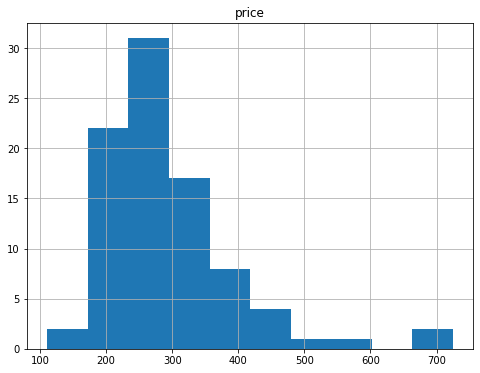

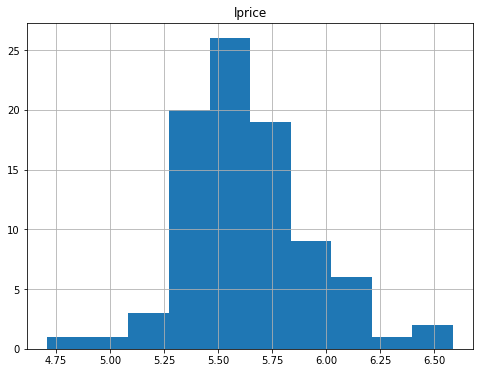

In [86]:
# 对数化对正态化的作用
## 以hprice1的price为例
### 未经对数化的直方图
hprice1.hist(column='price',figsize=(8,6))

### 对数化后的直方图
hprice1.hist(column='lprice',figsize=(8,6))

显然，对数化后的数据分布更接近正态分布！

# 5.假设误差分析

## 5.1 OLS估计新求解法

In [17]:
# 以gpa_lm2的ACT系数为例

# 新求解法
gpa_lm2_pre=sm.formula.ols('ACT~hsGPA',data=gpa1).fit()
gpa1['resid']=gpa_lm2_pre.resid
gpa_lm2_pre2=sm.formula.ols('colGPA~resid-1',data=gpa1).fit()
print('新解法的效果')
print(gpa_lm2_pre2.params[0])

新解法的效果
0.009426012260472114


### 5.1.1 估计系数的方差构成与多重共线性

在MLR.1~MLR.5下，$\operatorname{Var}\left(\hat{\beta}_{1}\right)$可计算为
$$
\operatorname{Var}\left(\hat{\beta}_{1}\right)=\frac{\sigma^{2}}{\sum_{i=1}^{n} \hat{r}_{i 1}^{2}}=\frac{\sigma^{2}}{S S T_{1}\left(1-R_{1}^{2}\right)}
$$
其中，$S S T_{1}=\sum_{i=1}^{n}\left(x_{i 1}-\bar{x}_{1}\right)^{2}$为$x_1$变量本身的完全平方和，$R_{1}^{2}$是$x_1$对其他解释变量所作回归的拟合优度判决系数，$\sigma^{2}$则是之前提及的随机误差的方差。至此，回归系数估计方差的构成就结构完毕了，它依赖于三个因素：

**· 误差方差$\sigma^{2}$**，随机误差的方差可以理解为数据集的噪声信息，噪声信息越多，估计的不确定性就越大，方差就越大，这点很顺理成章！但是一般来说，对于给定的数据集，误差方差也是随之确定的，我们一般不会在这个因素上下文章。

**· 自变量$x_1$本身的总变异$SST_1$**，自变量总变异越大，表明自变量散步程度越高，估计越牢靠。关于这个指标，我们会发现：对于一个分析任务来说，样本量越大，总变异也就越大，进而估计方差会变小，这告诉我们更多的随机样本有利于提高估计的精度！

**· 自变量间的线性关联程度$R_{1}^{2}$**，$R_{1}^{2}$约接近1，$x_1$与其他自变量之间的线性关系就越强烈，估计方差也越大。这种近似的共线性关系被称为**多重共线性(multicolinearity)**，它不同于完全共线性（事实上$R_{1}^{2}=1$时就是完全共线性），这种现象在数据分析中普遍存在，只是程度有所区别。那么如何衡量共线性的严重程度呢？我们一般用方差膨胀因子(VIF,Variance Inflation Factor)来评判
$$
VIF_{x1}=\frac{1}{1-R_{1}^{2}}
$$
若$VIR>10$，意味着共线性很严重，需要采取措施降低共线性。

现在的问题是，如何降低多重共线性呢？一种方法是使变量之间尽可能的不相关，关于这点我们可以查看变量之间的皮尔逊相关系数，如果某两个变量之间的相关系数非常高，我们就需要考虑不把它们同时放入模型中；第二种方法是减少自变量的个数。一般而言，模型中自变量个数越多，R方会越大。而$R_{1}^{2}$正是$x_1$对其他自变量做回归的判决系数，显然，其他自变量越多，$R_{1}^{2}$就越大。这个方法告诉我们，**模型的自变量绝非越多越好**，有关这个问题的讨论，我们会在下一节做深入探讨。

最后，我们总结一下降低估计方差，提高估计精度的方法

1. 采取更合理的数据采样方法，降低数据噪声。
2. 增大数据样本量
3. 根据线性相关程度筛选纳入模型的变量，且切忌纳入过多变量。

## 5.2 模型误设的误差分析——违反MLR.1的后果是什么

### 5.2.1 如何理解模型误设

在MLR.1中，我们假设自己设置的模型是“正确的”，即对
$$
y=\beta_{0}+\beta_{1} x_{1}+\beta_{2} x_{2}+\cdots+\beta_{k} x_{k}+u
$$
的假设上，我们正确地纳入了所有关键的自变量，且没有纳入多余的自变量。而多纳入一个无关的变量，以及少纳入一个关键的变量，都能算是违反MLR.1，我们可以看看误设模型对模型中变量系数的估计会有怎样子的影响。

### 5.2.2 变量选择的方法论

我们总结一下以上的内容：

1. 减少模型中的变量，可能会导致模型其他系数的估计有偏，但是会使系数估计的方差减少，即：增大偏差、减小方差
2. 增加模型中的变量，不会导致模型系数估计有偏，但是会使系数估计的方差增大，即：减小偏差、增大方差

而在实际情况中，我们不可能得知一个真正正确的模型，而是在摸索中慢慢找到适合纳入模型的变量。通常来说，有两种考量纳入变量的方法论：

1. 从少数变量开始，一步步向模型纳入我们认为重要的变量，并通过t检验显著性来判断是否纳入该变量；如果我们认为变量存在二次项效应与交互项效应，可以将其纳入模型并通过联合F检验判断其显著性，直到模型的解释度达到一个较高的水平。
2. 从多数变量开始，一步步将不显著的变量剔除出模型。

这两种方法该用哪一种，视具体情况而定。假若数据集的变量非常多，那我倾向于使用第一种方法，一步步将我们认为重要的变量纳入模型；若变量不多，则第二种方法可以考虑。

对于变量的选择，还有一些自动化的方法，如向前逐步选择、向后逐步选择等等。但我个人认为，这些自动的变量选择方法更关注模型的预测能力，而不注重变量本身对模型的意义，它们更适用于机器学习的预测任务，而不适用于回归分析，因为回归分析中最重要的意义就是“解释与推断”。

## 5.3 模型不满足正态性的分析——违反MLR.6的后果是什么

### 5.3.1 如何理解与观测正态性假设

查看样本因变量$y$的分布图就可以大致判断正态性了。

然而，因变量$y$不为正态分布的情况是非常常见的，以下面的$narr86$为例，它统计了青年人在某一特定年份被拘捕的次数。很明显，绝大部分青年人都没有被拘捕过，因此该变量的分布是一个严重的偏态分布，不可能为正态分布。


0.0     1970
1.0      559
2.0      121
3.0       42
5.0       13
4.0       12
6.0        4
12.0       1
9.0        1
10.0       1
7.0        1
Name: narr86, dtype: int64


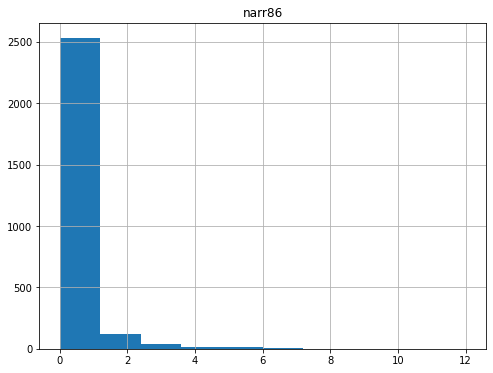

In [38]:
# 频数直方图
crime1=pd.read_stata('crime1.dta')
crime1.hist(column='narr86',figsize=(8,6))
print(crime1.narr86.value_counts())

# 6.异方差下的回归分析

## 6.1 广义最小二乘法

回归存在异方差的另一种解决方法，就是根据异方差的具体形式使用广义的最小二乘法，对模型进行重新估计。对于这种解决方法，变量系数的估计也会发生变化，但是在异方差情形下，它比传统的OLS估计法更优！

我们提到“根据异方差的具体形式”，是指异方差可以用自变量的函数被表达出来。如果它能被我们找出来，我们就可以是加权最小二乘估计WLS；如果由于函数形式复杂而无法被判断出来，我们则使用可行的广义最小二乘估计FGLS。

加权最小二乘法的原理非常简单。

假设异方差的形式除去一个常数外是已知的，即
$$
\operatorname{Var}(u \mid x)=\sigma^{2} h(x)
$$
那么如果我们在原模型两边同除以$\frac{1}{\sqrt{h\left( x \right)}}$，即
$$
\frac{y}{\sqrt{h\left( x \right)}}=\frac{\beta _{0}^{*}}{\sqrt{h\left( x \right)}}+\beta _{1}^{*}\frac{x_1}{\sqrt{h\left( x \right)}}+\cdots +\beta _{k}^{*}\frac{x_k}{\sqrt{h\left( x \right)}}+\frac{u}{\sqrt{h\left( x \right)}}
$$

并将带有$\frac{1}{\sqrt{h\left( x \right)}}$的自变量与随机误差视作是新的变量与随机误差，则问题就是同方差情形了，我们可以使用OLS估计。

我们使用一个简单的例子教会大家如何鉴别简单的异方差形式，并用statsmodels包中的wls函数进行wls估计。

**· Example13.** 我们想研究27家企业主管人数Y与工人人数X的关系。由于只有一个自变量，一开始我们可以考虑简单线性回归模型
$$
Y=\beta _0+\beta _1X+u
$$

In [19]:
# 载入数据集
data=pd.read_table('./data/P176.txt')
data.head()

,X,Y
0,294,30
1,247,32
2,267,37
3,358,44
4,423,47


Text(0.5, 1.0, 'resid_ols | X')

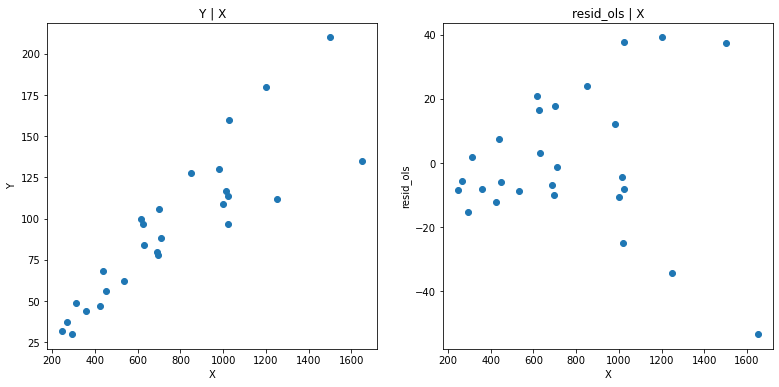

In [21]:
# 在判断异方差函数的形式上，可视化发挥着重要的作用。我们可以采用之前画散点图的办法，初步观测样本分布的情况。
# 直接看Y与X的散点图
fig=plt.figure(figsize=(13,6))
ax1=fig.add_subplot(1,2,1)
plt.scatter(data.X,data.Y,axes=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Y | X')

# 查看ols估计的残差与X的散点图
data_lm=sm.formula.ols('Y~X',data=data).fit()
ax2=fig.add_subplot(1,2,2)
plt.scatter(data.X,data_lm.resid,axes=ax2)
ax2.set_xlabel('X')
ax2.set_ylabel('resid_ols')
ax2.set_title('resid_ols | X')